## Loading the data

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
s3_client = boto3.client('s3')
response = s3_client.get_object(Bucket="spanishwines",Key="wines_SPA.csv")
file = response["Body"]

# Load the dataset
file_path = "C:/Users/HP/Documents/cloud_computing/Cloud Computing Team-11/wines_SPA.csv"  # Update the path to your file
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())


                 winery                          wine  year  rating  \
0   Pago de Carraovejas                     El Anejon  2015     4.7   
1    Vinedos de Paganos                      La Nieta  2015     4.7   
2           Emilio Moro     Malleolus de Valderramiro  2016     4.7   
3  Quinta de la Quietud         La Mula de la Quietud  2015     4.7   
4         Bodegas Mauro  Terreus Paraje de Cueva Baja  2017     4.7   

   num_reviews country            region  price                  type  body  \
0          543  Espana  Ribera del Duero  75.10  Ribera Del Duero Red   5.0   
1          312  Espana             Rioja  82.58             Rioja Red   4.0   
2          300  Espana  Ribera del Duero  84.95  Ribera Del Duero Red   5.0   
3          256  Espana              Toro  63.75              Toro Red   5.0   
4          251  Espana   Castilla y Leon  66.07           Tempranillo   4.0   

   acidity  
0      3.0  
1      3.0  
2      3.0  
3      3.0  
4      2.0  


## Cleaning the data

In [27]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/HP/Documents/cloud_computing/Cloud Computing Team-11/wines_SPA.csv')

# Display initial missing values
print("Initial missing values:\n", data.isnull().sum())

# Handling non-numeric entries in 'year'
data['year'] = pd.to_numeric(data['year'], errors='coerce')  # Convert errors to NaN

# Drop rows where 'year' is NaN since it's critical and only 2 missing
data.dropna(subset=['year'], inplace=True)

# Convert 'year' to int after cleaning
data['year'] = data['year'].astype(int)

# Fill missing values in 'type', 'body', 'acidity' with placeholders or suitable statistics
data['type'].fillna('Unknown', inplace=True)
data['body'].fillna(data['body'].mean(), inplace=True)
data['acidity'].fillna(data['acidity'].mean(), inplace=True)

# Check final state of missing values
print("Final missing values:\n", data.isnull().sum())



Initial missing values:
 winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64
Final missing values:
 winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64


## Handling Outliers

In [28]:
# Handling outliers for 'price'
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data = remove_outliers(data, 'price')

# Save the cleaned data
data.to_csv('C:/Users/HP/Documents/cloud_computing/Cloud Computing Team-11/Cleaned_wines_SPA.csv', index=False)


## Exploratory Data Analysis (EDA)

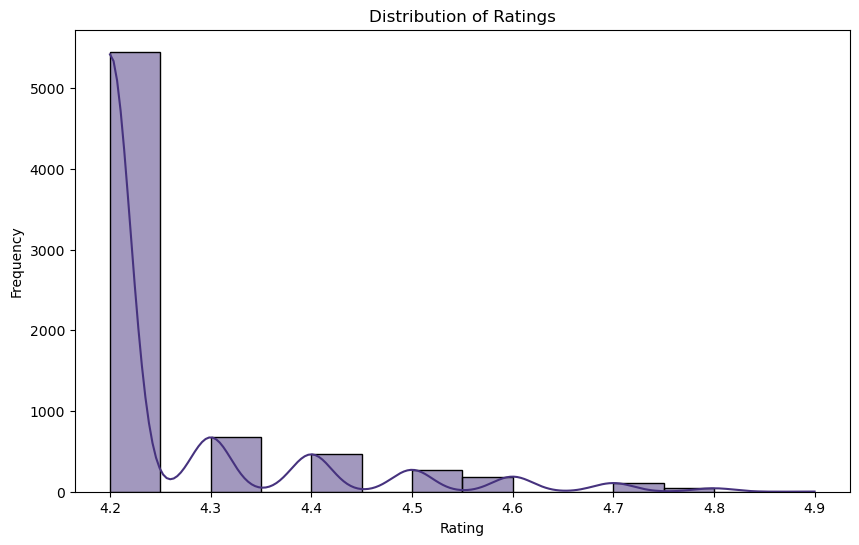

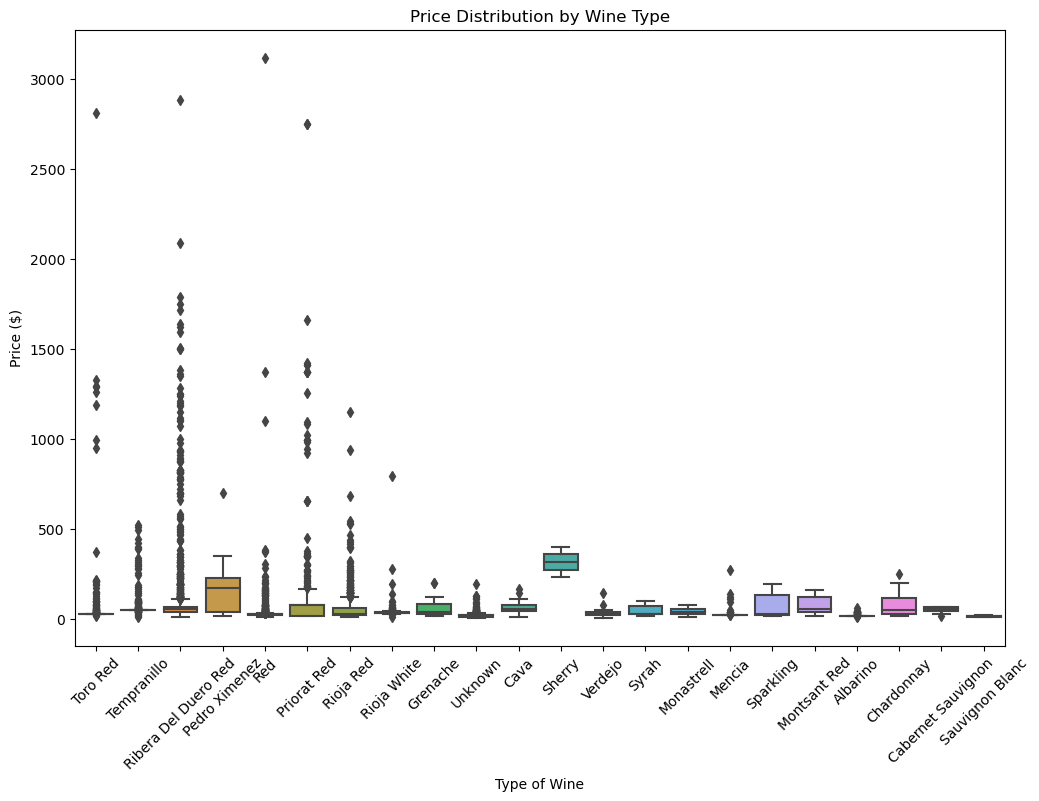

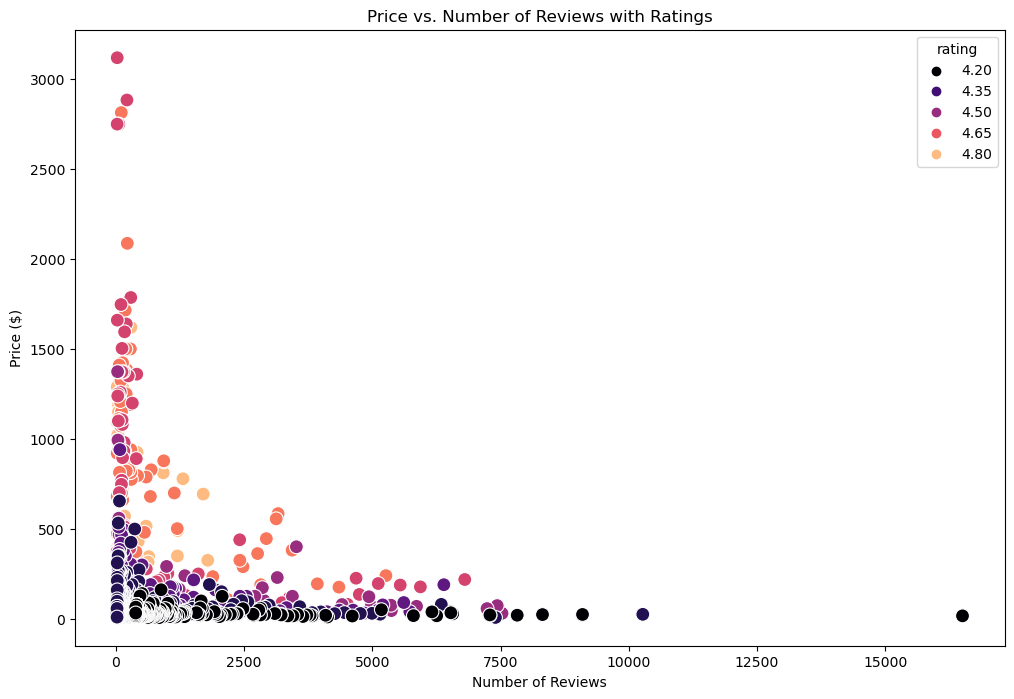

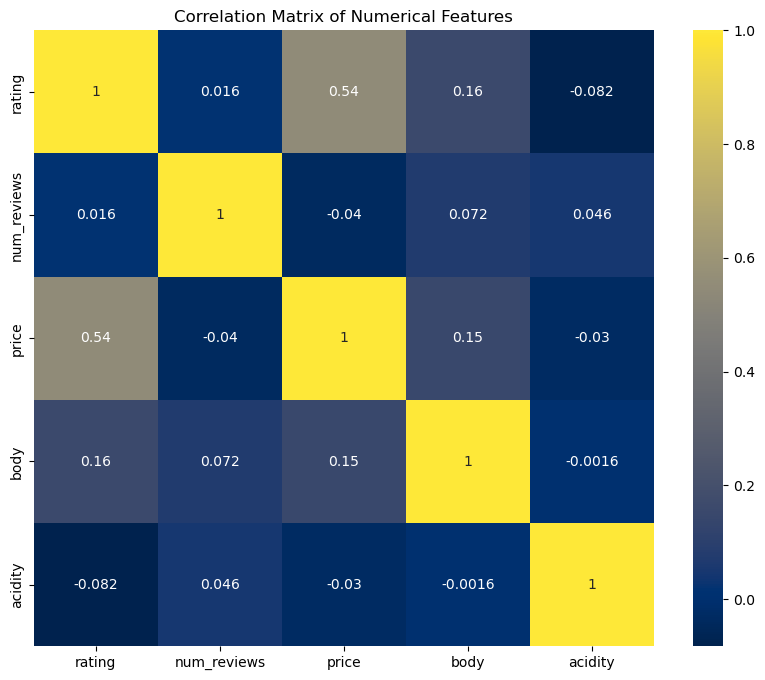

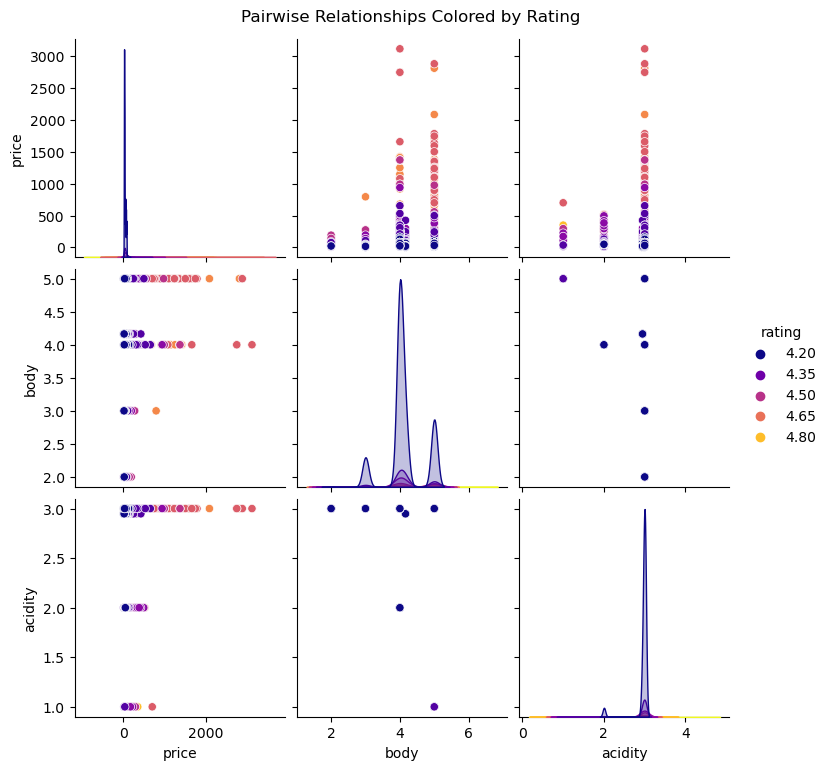

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('C:/Users/HP/Documents/cloud_computing/Cloud Computing Team-11/wines_SPA.csv')

# Setting a vibrant color palette
sns.set_palette("viridis")

# Histogram of 'rating' with a KDE overlay
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'price' by 'type' using a vibrant color scheme
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='price', data=data)
plt.xticks(rotation=45)
plt.title('Price Distribution by Wine Type')
plt.xlabel('Type of Wine')
plt.ylabel('Price ($)')
plt.show()

# Scatter plot of 'price' vs 'num_reviews' colored by 'rating'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='num_reviews', y='price', hue='rating', data=data, palette='magma', s=100)
plt.title('Price vs. Number of Reviews with Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.show()

# Heatmap of correlations between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = data[['rating', 'num_reviews', 'price', 'body', 'acidity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='cividis')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Pairplot with a vibrant palette
sns.pairplot(data[['rating', 'price', 'body', 'acidity']], hue='rating', palette='plasma')
plt.suptitle('Pairwise Relationships Colored by Rating', y=1.02)
plt.show()


## Linear Regression

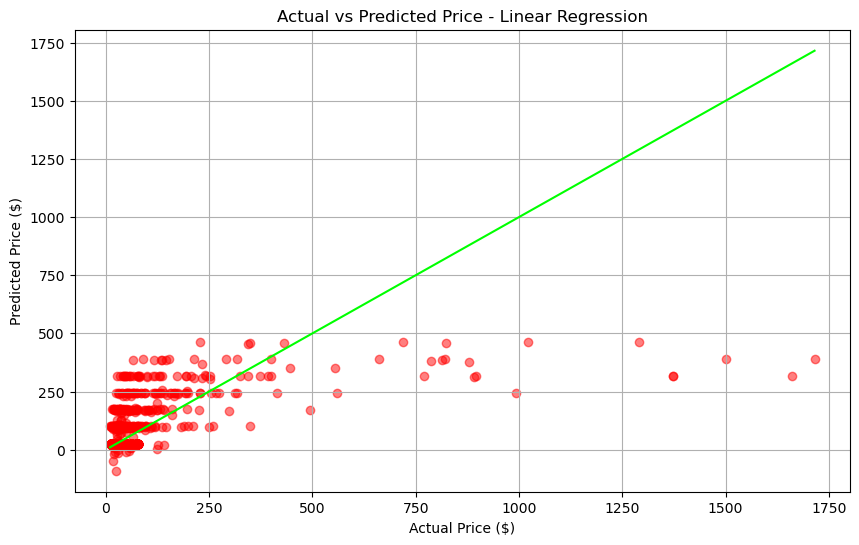

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load and prepare your data
data = pd.read_csv('C:/Users/HP/Documents/cloud_computing/Cloud Computing Team-11/wines_SPA.csv')
X = data[['rating', 'num_reviews']]
y = data['price']

# Split data and fit model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
predictions_lin = model_lin.predict(X_test)

# Plotting actual vs predicted prices with a vibrant color palette
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_lin, alpha=0.5, color='red')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Price - Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='lime')  # Line for perfect predictions
plt.grid(True)
plt.show()


## Logistic Regression

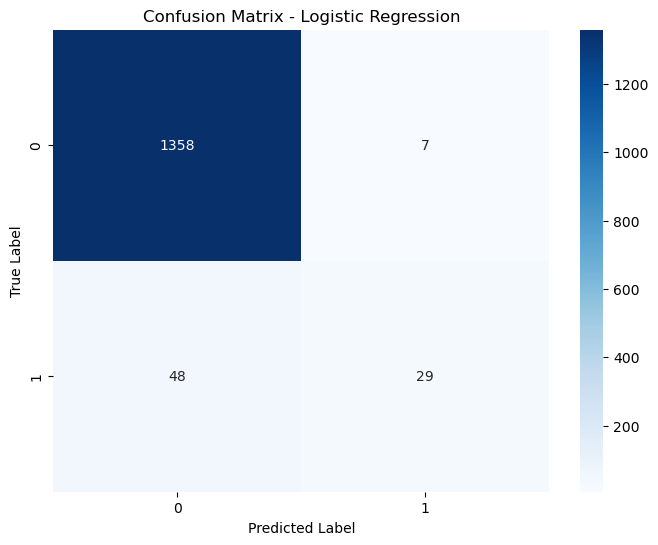

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
data['high_rating'] = (data['rating'] > 4.5).astype(int)
X_log = data[['price', 'num_reviews']]
y_log = data['high_rating']
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Fit model
model_log = LogisticRegression()
model_log.fit(X_train_log, y_train_log)
predictions_log = model_log.predict(X_test_log)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_log, predictions_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Cluster Analysis

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_14356\2780978291.py:20: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  scatter = sns.scatterplot(x=data['price'], y=data['rating'], hue=data['cluster'], palette=palette, s=100, alpha=0.8, legend='full')


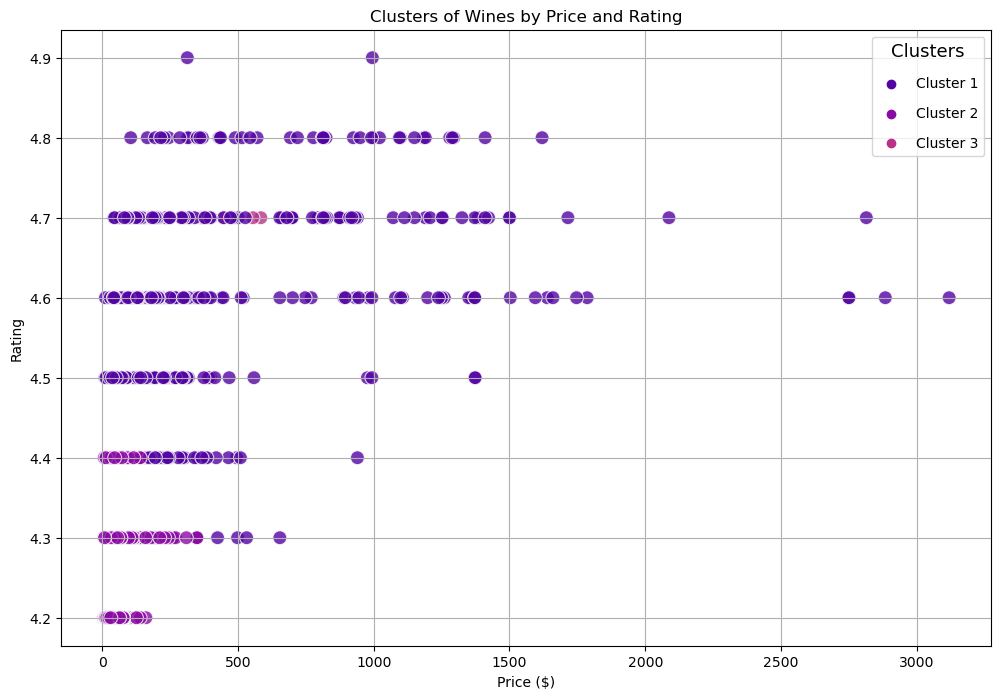

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


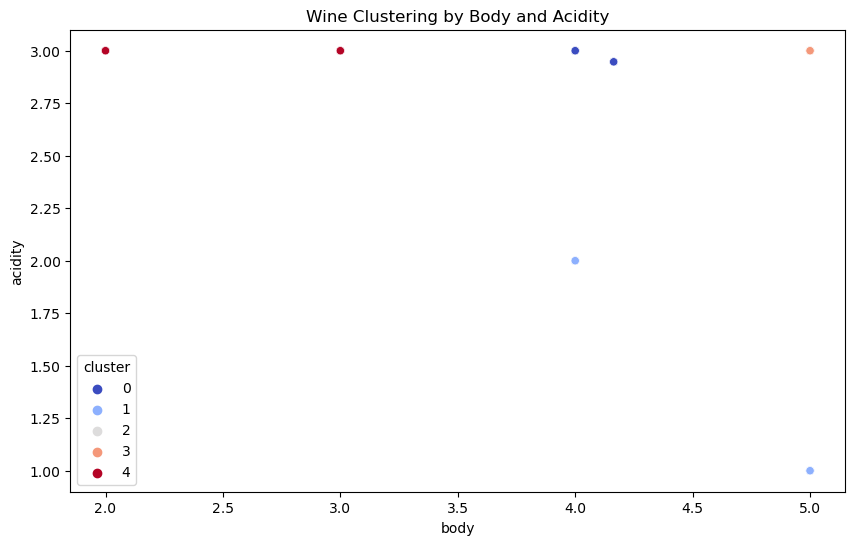

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is already loaded and preprocessed
# Scale the data for better clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['price', 'rating', 'num_reviews']])

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['cluster'] = clusters

# Visualizing clusters with an enhanced color palette
plt.figure(figsize=(12, 8))
palette = sns.color_palette("plasma", as_cmap=False)  # Using the 'plasma' palette for vibrant colors
scatter = sns.scatterplot(x=data['price'], y=data['rating'], hue=data['cluster'], palette=palette, s=100, alpha=0.8, legend='full')
plt.title('Clusters of Wines by Price and Rating')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.grid(True)  # Adding grid for better readability

# Adding a legend with cluster labels
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, ['Cluster 1', 'Cluster 2', 'Cluster 3'], title="Clusters", title_fontsize='13', labelspacing=1.15)

plt.show()


# Scaling data
scaler = StandardScaler()
features = data[['body', 'acidity', 'price']]
scaled_features = scaler.fit_transform(features)

# Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data['cluster'] = clusters

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='body', y='acidity', hue='cluster', data=data, palette='coolwarm', legend='full')
plt.title('Wine Clustering by Body and Acidity')
plt.show()

## Time Series Analysis

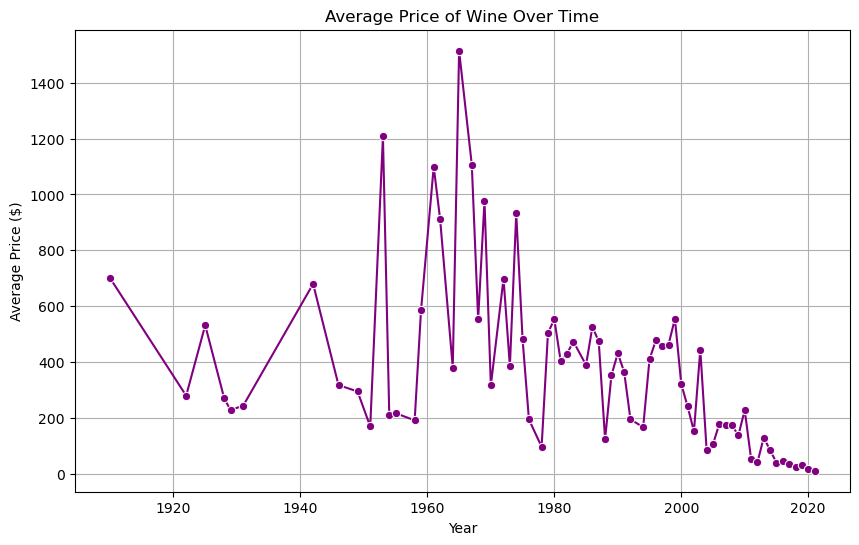

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('C:/Users/HP/Documents/cloud_computing/Cloud Computing Team-11/wines_SPA.csv')

# Group by year and calculate average price
average_price_year = data.groupby('year')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='price', data=average_price_year, marker='o', color='purple')
plt.title('Average Price of Wine Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()


## Market Basket Analysis

In [22]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Example transactions (replace this with your actual transactional data)
transactions = [['Chardonnay', 'Merlot'], ['Cabernet', 'Merlot', 'Chardonnay'], ['Cabernet']]

# One-hot encode the data
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Generating frequent itemsets
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Generating the rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display rules
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


               antecedents             consequents   support  confidence
0               (Cabernet)            (Chardonnay)  0.333333         0.5
1             (Chardonnay)              (Cabernet)  0.333333         0.5
2               (Cabernet)                (Merlot)  0.333333         0.5
3                 (Merlot)              (Cabernet)  0.333333         0.5
4             (Chardonnay)                (Merlot)  0.666667         1.0
5                 (Merlot)            (Chardonnay)  0.666667         1.0
6   (Cabernet, Chardonnay)                (Merlot)  0.333333         1.0
7       (Cabernet, Merlot)            (Chardonnay)  0.333333         1.0
8     (Chardonnay, Merlot)              (Cabernet)  0.333333         0.5
9               (Cabernet)    (Chardonnay, Merlot)  0.333333         0.5
10            (Chardonnay)      (Cabernet, Merlot)  0.333333         0.5
11                (Merlot)  (Cabernet, Chardonnay)  0.333333         0.5



### Understanding the Output:

1. **Antecedents**: This is the item or items that lead in the rule. For example, if `(Cabernet)` is the antecedent, it means the rule starts with Cabernet.

2. **Consequents**: This is the item or items that follow in the rule. If `(Chardonnay)` is the consequent, it means the rule ends with Chardonnay.

3. **Support**: This metric indicates how frequently the itemset appears in all transactions. For example, the support of 0.333333 for `(Cabernet, Chardonnay)` means that this pair appears in about 33.33% of all transactions.

4. **Confidence**: This metric indicates the likelihood that the consequent is bought when the antecedent is bought. For example, a confidence of 1.0 for `(Chardonnay) => (Merlot)` means that if Chardonnay is bought, Merlot is also bought 100% of the time in this dataset.

### Insights and Business Applications:

- **High Confidence Items**: Items with a high confidence value, like `(Chardonnay) => (Merlot)` with a confidence of 1.0, suggest a very strong association that can be leveraged for marketing strategies such as promotions or bundled offers.

- **Cross-Selling Opportunities**: Rules such as `(Cabernet, Chardonnay) => (Merlot)` with high confidence indicate that when customers buy both Cabernet and Chardonnay, they also tend to buy Merlot. This could be used to suggest Merlot to customers who have both of the other wines in their basket.

- **Inventory Management**: Understanding which items are often bought together can help in managing inventory more efficiently to ensure that high-demand combinations are always in stock.

- **Targeted Marketing**: Marketing campaigns can be tailored based on the association rules to target specific customer segments that are more likely to buy certain combinations of products.


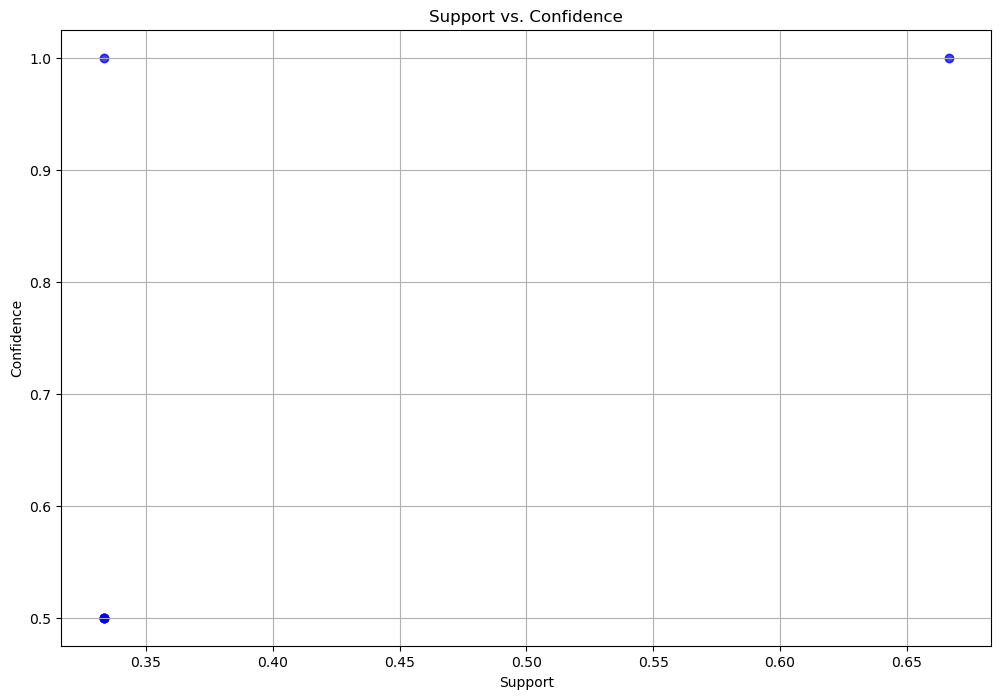

In [23]:
import matplotlib.pyplot as plt

# Assuming 'rules' is already defined and contains your market basket analysis results
plt.figure(figsize=(12, 8))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, marker='o', color='blue')
plt.title('Support vs. Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()
